In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")

import sys 
import os
sys.path.append(os.path.abspath("../src"))   
import soporte_preprocesamiento as f


In [2]:
df_crudo= pd.read_csv("../datos/EF/Datos_alimentados/datos_ef_alimentados.csv", index_col=0)

In [3]:
df_crudo["metrosvi"].unique()

array(['Entre 76 y 90 m2', 'Entre 121 y 150 m2', 'Entre 106 y 120 m2',
       'Entre 61 y 75 m2', 'Entre 91 y 105 m2', 'Entre 46 y 60 m2',
       'Más de 180 m2', 'Entre 151 y 180 m2', 'Entre 31 y 45 m2',
       'Hasta 30 m2'], dtype=object)

**SEGMENTAMOS LOS DATOS POR TAMAÑO DE VIVIENDA**

In [4]:
# creo una nueva columna con las categorías
df_crudo["categoria"] = df_crudo["metrosvi"].apply(f.obtener_categoria)

df_crudo.head()

,iden,idq_pv,idq_mun,tam_muni,factor,mesent,anoent,yoresi,otroresi,nresi,regvi,pagovi,calefac,tipocombcale,tipoagua,wc,boducha,aireacond,aislam,adaptada,cocina,lavadora,lavavajillas,secadora,horno,microondas,vitroinduc,naseos,nsalones,ndormito,nsototrast,notrashabit,metrosvi,nvehiculos,papel,vidrio,envases,organico,halogena,bajoconsumo,led,servdomes,ayudaext,ruidos,contamin,sucio,malcomunic,pocoverde,delincuencia,molesturist,colegio,csalud,super,farmacia,bares,cambioresi,segunresi,lugsegunresi,otraccaa,otropais,diasusa,ingrehog,tipoedif,tipoedifviv,nplantassob,nplantasbajo,annoedifinterv,estadoedif,accesoedif,ascensor,garaje,nplazasgar,gastuberia,aguacalcent,evacuaguares,tipoevacuares,erfotov,nviviendp,vehiculos,renovables,conectividad,ccaa,ayudas_ccaa,bonificaciones,horas_de_sol,radiacion_solar,categoria
0,1,Álava,Municipio_pequeño,De 50.000 habitantes o menos,63.480315,Junio,2021,Si,No,1,Propia por compra con pagos pendientes,De 200€ a menos de 300€,No tiene calefacción,Desconocido,abastecimiento público,Si,Si,No,Si,No,Si,Si,No,No,Si,Si,Si,1,1,3,0,0,Entre 76 y 90 m2,1,Si,Si,Si,Si,No,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.500€ a menos de 2.000€,Multifamiliar,Edificio con 10 o más viviendas,3,1,De 1991 a 2000,moderadamente bueno,No es accesible,No,Si,De 101 a 150,No,No,Si,Alcantarillado,No,4,convencional,no tiene renovable,Sin internet,País Vasco,6200,IBI,2147,4.2,Viviendas medianas
1,2,Álava,Municipio_pequeño,De 50.000 habitantes o menos,53.005532,Julio,2021,No,Si,2,Propia por compra totalmente pagada,Desconocido,individual,Gas natural,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,No,Si,Si,Si,3,1,3,2,0,Entre 121 y 150 m2,1,Si,Si,Si,Si,Si,No,Si,No dispone de servicio doméstico,"ayudas de familiares, parientes, amigos, vecinos",No,Si,No,No,No,Si,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 1.000€ a menos de 1.500€,Unifamiliar,Vivienda unifamiliar,2,1,De 1991 a 2000,casi perfecto,No es accesible,No,Si,2,Si,Si,Si,Alcantarillado,No,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2,Viviendas amplias
2,3,Álava,Municipio_pequeño,De 50.000 habitantes o menos,61.559149,Junio,2021,Si,Si,4,Propia por compra con pagos pendientes,De 700€ a menos de 800€,individual,Electricidad,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,Si,Si,Si,Si,4,1,4,2,0,Entre 106 y 120 m2,3,Si,Si,Si,No,Si,Si,Si,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,No,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 2.500€ a menos de 3.000€,Unifamiliar,Vivienda unifamiliar,2,1,De 2001 a 2010,casi perfecto,Es accesible,No,Si,1,Si,No,Si,Alcantarillado,No,1,convencional,no tiene renovable,banda ancha fija,País Vasco,4800,IBI,2147,4.2,Viviendas amplias
3,4,Álava,Municipio_pequeño,De 50.000 habitantes o menos,73.385525,Diciembre,2021,Si,No,1,Propia por herencia o donación,Desconocido,individual,Electricidad,abastecimiento público,Si,Si,No,No,No,Si,Si,Si,No,Si,Si,Si,1,2,3,0,0,Entre 61 y 75 m2,1,Si,Si,No,Si,Si,Si,No,No dispone de servicio doméstico,No dispone de ayudas externas no remuneradas,No,No,No,Si,No,No,No,Si,Si,Si,Si,Si,No,No,No tiene segunda residencia,No tiene segunda residencia,No tiene/ está en España,No tiene segunda residencia,De 2.000€ a menos de 2.500€,Multifamiliar,Edificio de 3 a 9 viviendas,3,0,De 1951 a 1960,bueno,No es accesible,No,No,No tiene garaje,No,No,Si,Alcantarillado,No,2,convencional,no tiene renovable,banda ancha fija,País Vasco,6200,IBI,2147,4.2,Viviendas medianas
4,5,Álava,Municipio_pequeño,De 50.000 habitantes o menos,59.495080,Mayo,2021,Si,Si,4,Propia por compra totalmente pagada,Desconocido,individ

In [7]:
df_pequeñas=df_crudo[df_crudo["categoria"]== "Viviendas pequeñas"]
df_medianas=df_crudo[df_crudo["categoria"]== "Viviendas medianas"]
df_amplias=df_crudo[df_crudo["categoria"]== "Viviendas amplias"]
df_grandes=df_crudo[df_crudo["categoria"]== "Viviendas grandes"]

In [8]:
df_pequeñas.to_csv("../datos/EF/Datos_segmentados/datos_ef_pequeñas.csv")
df_medianas.to_csv("../datos/EF/Datos_segmentados/datos_ef_medianas.csv")
df_amplias.to_csv("../datos/EF/Datos_segmentados/datos_ef_amplias.csv")
df_grandes.to_csv("../datos/EF/Datos_segmentados/datos_ef_grandes.csv")

**ASEGURAMOS QUE SE HAN CLASIFICADO CORRECTAMENTE**

In [9]:
df_pequeñas["metrosvi"].unique()

array(['Entre 31 y 45 m2', 'Hasta 30 m2'], dtype=object)

In [10]:
df_medianas["metrosvi"].unique()

array(['Entre 76 y 90 m2', 'Entre 61 y 75 m2', 'Entre 46 y 60 m2'],
      dtype=object)

In [11]:
df_amplias["metrosvi"].unique()

array(['Entre 121 y 150 m2', 'Entre 106 y 120 m2', 'Entre 91 y 105 m2'],
      dtype=object)

In [12]:
df_grandes["metrosvi"].unique()

array(['Más de 180 m2', 'Entre 151 y 180 m2'], dtype=object)

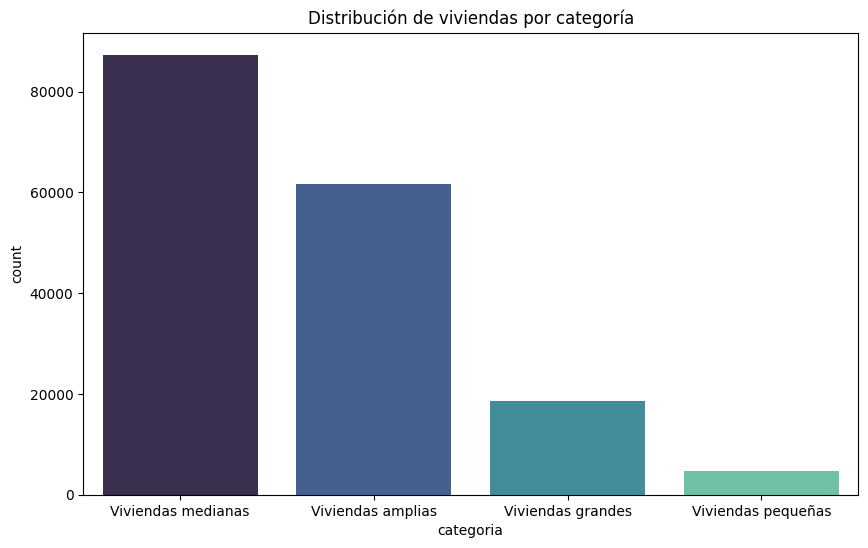

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x="categoria", data=df_crudo, palette="mako")
plt.title("Distribución de viviendas por categoría")
plt.show();